In [1]:
import numpy as np
import sklearn
from sklearn import svm
from skimage import data, io, filters
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# custom scripts
import config # params, constants
import data # functions that mutate outr data

 Dataset :: namedtuple(
    ['train' = ['img_name']
    , 'test' = ['img_name']
    , 'labels' = pandas.df('img_name','breed')
    , 'dict_index_to_label' = dict to convert label_index -> label_name
    , 'dict_label_to_index'= dict to convert label_name -> label_index
    


In [3]:
import os
cwd = os.getcwd()
print(cwd)

/Users/mark/src/dog-breed-identification/src


In [4]:
cat = data.chelsea()
type(cat)
io.imshow(cat)

AttributeError: module 'data' has no attribute 'chelsea'

In [ ]:
# the img is a 300x451 matrix, with 3 color values per cell (rgb)
cat.shape

In [5]:
# mean pixel value, TODO per r,g,b?
cat.mean()

115.30514166050752

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


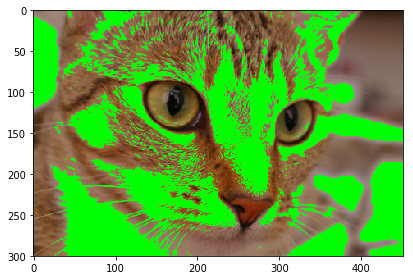

In [6]:
reddish = cat[:, :, 0] > 160
cat[reddish] = [0, 255, 0]
io.imshow(cat)

# Plot multiple

In [31]:
def plot(data):
    #     n, w, h = data.shape
    n = len(data)
    
    plt.figure(figsize=(12, 12*n))
    for i in range(n):
        ax = plt.subplot(1,n, i+1)
        plt.imshow(data[i], cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

In [19]:
dataset = data.init_dataset()
labels = dataset.labels
dataset.train[0:3]

['000bec180eb18c7604dcecc8fe0dba07.jpg',
 '001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '001cdf01b096e06d78e9e5112d419397.jpg']

['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever', 'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound']


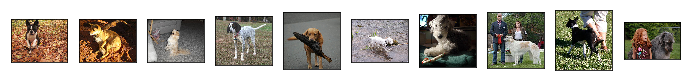

In [32]:
x_train = []
y_train = []
for i,img_name in enumerate(dataset.train[0:10]):
    img = data.read_img('train/',img_name)
    x_train.append(img)
    id_ = img_name.split('.')[0]
    breed = labels.loc[labels['id'] == id_]
    y_train.append(breed['breed'].item())


plot(x_train)
print(y_train)